# Лабораторная работа №2: Моделирование и анализ линейных комбинаций дискретных сигналов

Выполнили студенты гр. 2384 Тимченко Дмитрий Алексеевич и Цыганков Роман Максимович. Вариант №.19

## Цель работы

Изучить математическое описание линейных комбинаций дискретных гармонических сигналов и овладеть программными средствами их моделирования.

## Основные теоретические положения

Дискретный единичный скачок:

$ \sigma_d(k) =
\begin{cases}
1, & k \geq 0, \\
0, & k < 0,
\end{cases}
\quad k \in \mathbb{Z} $

Дискретный прямоугольный импульс:

$ s_1(k) =
\begin{cases}
U, & n_0 \le k \le n_0 + n_{imp} - 1, \\
0, & иначе
\end{cases} $

Линейная комбинация дискретных гармонических сигналов:

$ s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k), \enspace $ где $ \enspace x_i(k) = B_i sin(w_i k), \enspace i = 1, 2, 3 $

Дискретный гармонический сигнал:

$s(k) = C \cdot cos(w_0 k)$

## Постановка задачи

С помощью программных средств провести моделирование и анализ линейных комбинацций дискретных гармонических последовательностей. Результаты подкрепить соответствующими графиками и выводами.

## Выполнение работы

Пункты работы выполняется с помощью кода.

In [11]:
import numpy as np
import matplotlib.pyplot as plt
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import seaborn as sns

In [19]:
Nbr = 19
N = 30 + Nbr % 5
a = (-1) ** Nbr * (0.8 + 0.005 * (Nbr % 20))
C = 1 + Nbr % 5
w0 = np.pi / (6 + Nbr % 5)
U = Nbr % 20 + 1
n0 = 3 + Nbr % 5
n_imp = 5 + Nbr % 5
B1 = 1.5 + Nbr % 5
B2 = 5.7 - Nbr % 5
B3 = 2.2 + Nbr % 5
w1 = np.pi / (4 + Nbr % 5)
w2 = np.pi / (8 + Nbr % 5)
w3 = np.pi / (16 + Nbr % 5)
a1 = 1.5 - Nbr % 5
a2 = 0.7 + Nbr % 5
a3 = 1.4 + Nbr % 5
print(f'Nbr = {Nbr}, N = {N}, a = {a}, C = {C}, w0 = {w0}, U = {U}, n0 = {n0}, n_imp = {n_imp}')
print(f'B1 = {B1}, B2 = {B2}, B3 = {B3}')
print(f'w1 = {w1}, w2 = {w2}, w3 = {w3}')
print(f'a1 = {a1}, a2 = {a2}, a3 = {a3}')

Nbr = 19, N = 34, a = -0.895, C = 5, w0 = 0.3141592653589793, U = 20, n0 = 7, n_imp = 9
B1 = 5.5, B2 = 1.7000000000000002, B3 = 6.2
w1 = 0.39269908169872414, w2 = 0.2617993877991494, w3 = 0.15707963267948966
a1 = -2.5, a2 = 4.7, a3 = 5.4


## 1. Смоделировать дискретный прямоугольный импульс:

$$
s_1(k) = 
\begin{cases} 
U, & n_0 \leqslant k \leqslant n_0 + n_{imp} - 1 \\
0, & \text{иначе}
\end{cases}
$$

на основе дискретного единичного скачка $\sigma_d(k)$ из л/р №1 с выводом графика на интервале времени $n \in [0, N-1]$.

Пояснить как выполняется моделирование импульса.

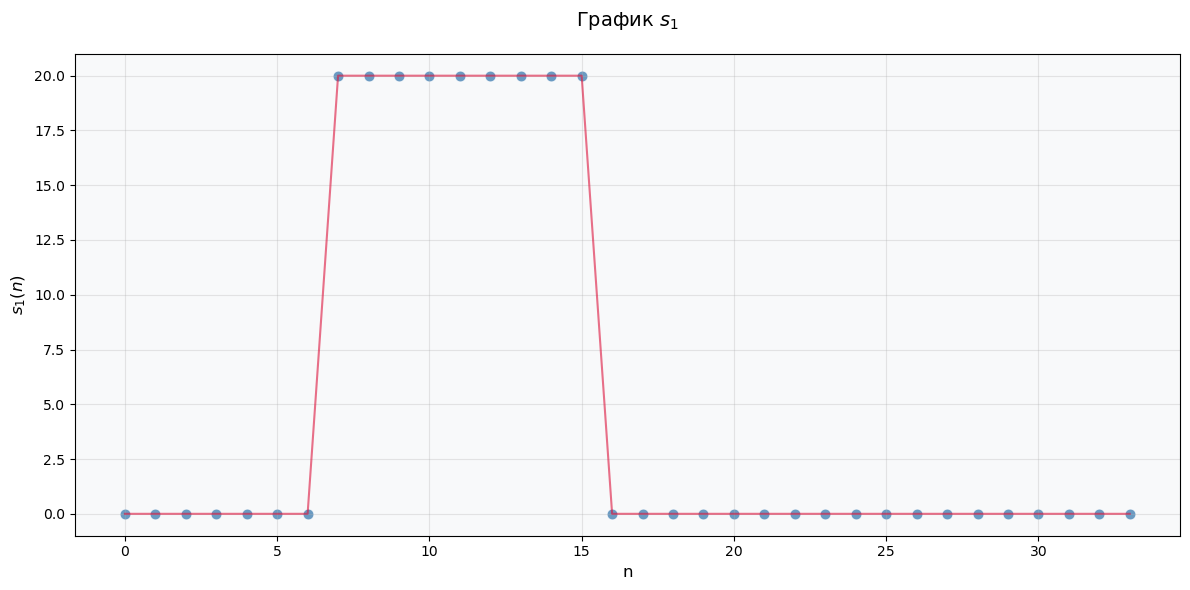

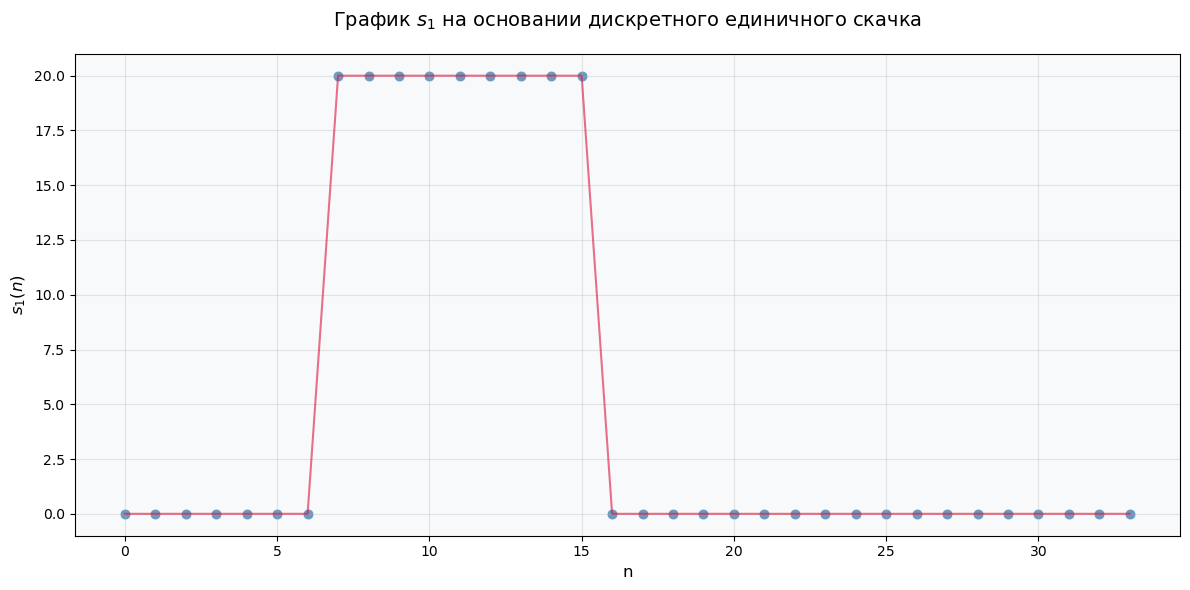

In [25]:
def sigma_d(k):
  return 1 if k >= 0 else 0

def s1(k):
  return U if n0 <= k <= n0 + n_imp - 1 else 0

def visualize_signal(samples, values, plot_title, x_axis_label, y_axis_label):
    fig, ax = plt.subplots(figsize=(12, 6))
    
    sns.scatterplot(x=samples, y=values, color='steelblue', s=60, alpha=0.8, ax=ax)
    sns.lineplot(x=samples, y=values, color='crimson', alpha=0.6, linewidth=1.5, ax=ax)
    
    ax.set_title(plot_title, fontsize=14, pad=20)
    ax.set_xlabel(x_axis_label, fontsize=12)
    ax.set_ylabel(y_axis_label, fontsize=12)
    
    ax.grid(True, alpha=0.3)
    ax.set_facecolor('#f8f9fa')
    
    plt.tight_layout()
    plt.show()

n = np.arange(N)
Y_s1 = [s1(k) for k in n]
Y_sigma = [U * (sigma_d(k - n0) - sigma_d(k - (n0 + n_imp))) for k in n]

#дискретный прямоугольный импульс s1
visualize_signal(n, Y_s1, 'График $s_1$', 'n', '$s_1(n)$')

#дискретный прямоугольный импульс на основании дискретного единичного скачка
visualize_signal(n, Y_sigma, 'График $s_1$ на основании дискретного единичного скачка', 'n', '$s_1(n)$')

Моделирование импульса выполнено с использованием дискретного единичного скачка следующим способом:

Моделирование прямоугольного импульса основано на применении дискретного единичного скачка:

Функция единичного скачка принимает значение:
- $0$ для $k < 0$
- $1$ для $k \geq 0$

Прямоугольный импульс формируется как разность двух сдвинутых единичных скачков, умноженная на амплитудный коэффициент $U$:

$$s_1(k) = U \cdot [\sigma_d(k - n_0) - \sigma_d(k - (n_0 + n_{imp}))]$$

Компоненты уравнения:
- $\sigma_d(k - n_0)$ - определяет начало импульса
- $\sigma_d(k - (n_0 + n_{imp}))$ - определяет конец импульса

Такая комбинация создаёт прямоугольный сигнал длительностью $n_{imp}$ отсчётов, а коэффициент $U$ устанавливает необходимую амплитуду импульса.

## 2.Смоделировать линейную комбинацию дискретных гармонических сигналов $s_2(k)$:

$$s_2(k) = a_1 x_1(k) + a_2 x_2(k) + a_3 x_3(k)$$

где
$$x_i(k) = B_i \sin(\hat{\omega}_i k), \quad i = 1, 2, 3$$

с выводом графиков последовательностей $x_i(k)$ и $s_2(k)$ на интервале времени $n \in [0, 5N-1]$.

Вычислить:
- среднее значение (идентификатор `mean_s2`)
- энергию (идентификатор `E`) 
- среднюю мощность последовательности $s_2(k)$ (идентификатор `P`)

**Пояснить:**
- операции при моделировании линейной комбинации сигналов $s_2(k)$;
- как определяют указанные характеристики.

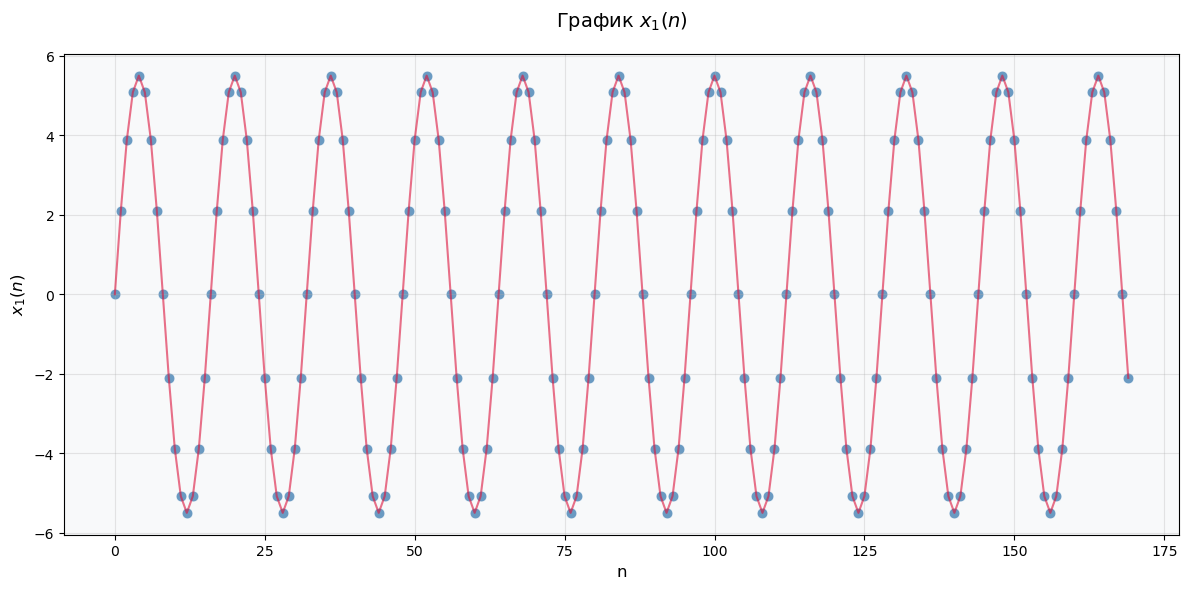

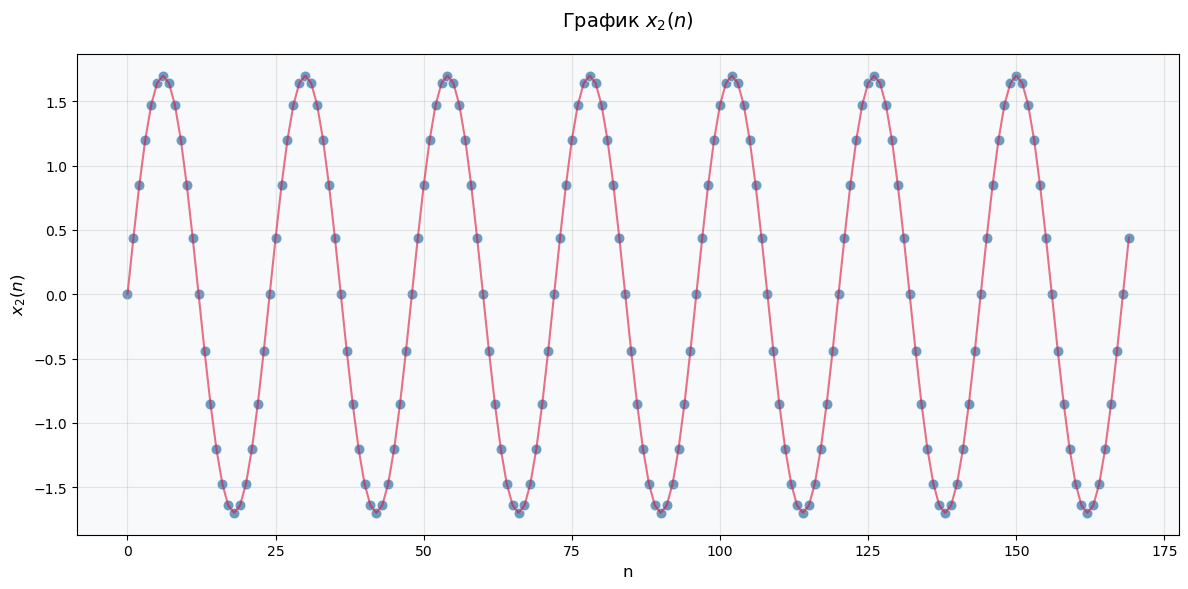

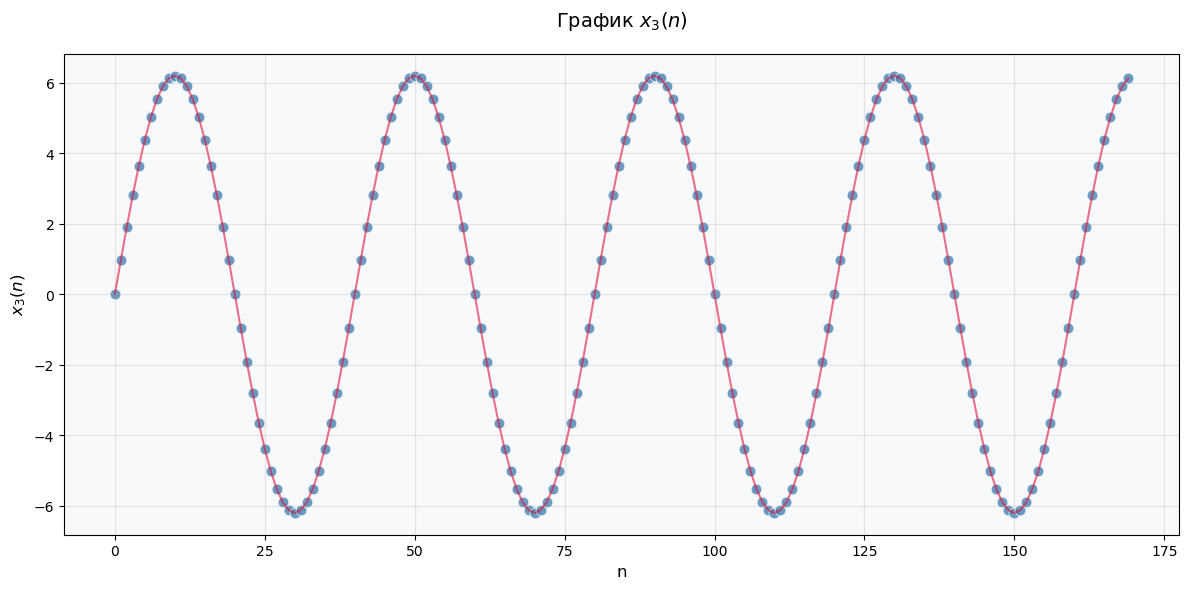

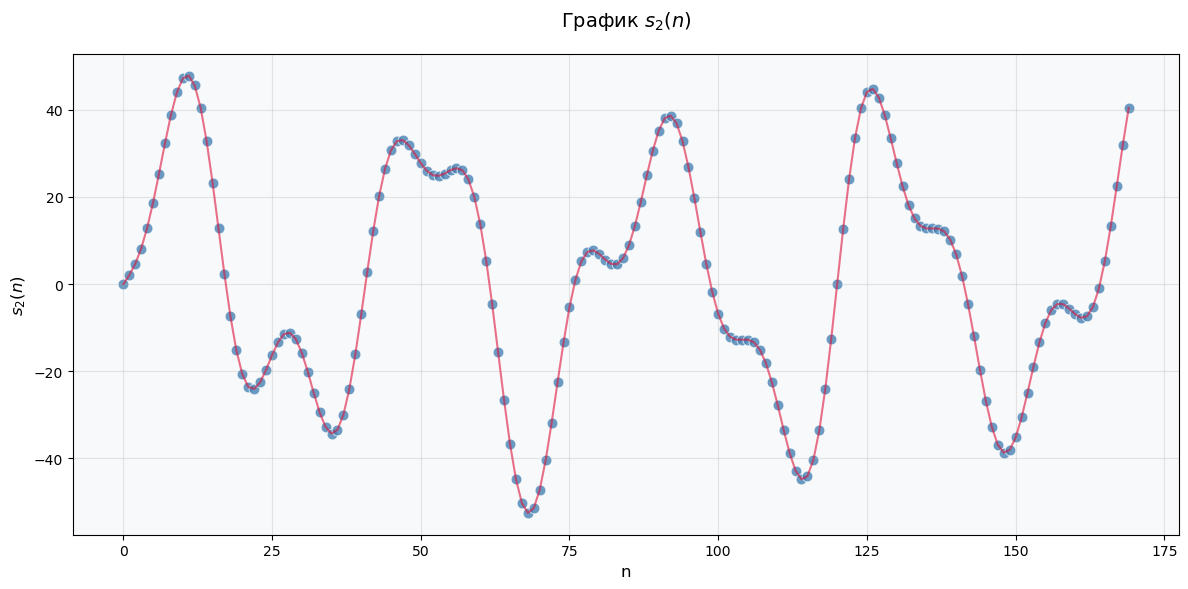

mean_s2 = 0.7892106507777833, E = 110847.78920679263, P = 652.045818863486


In [31]:
def x1(k):
  return B1 * np.sin(w1 * k)

def x2(k):
  return B2 * np.sin(w2 * k)

def x3(k):
  return B3 * np.sin(w3 * k)

def s2(k):
  return a1 * x1(k) + a2 * x2(k) + a3 * x3(k)

n = np.arange(5 * N)
Y_x1 = [x1(k) for k in n]
Y_x2 = [x2(k) for k in n]
Y_x3 = [x3(k) for k in n]
Y_s2 = [s2(k) for k in n]

#гармонический сигнал x1
visualize_signal(n, Y_x1, 'График $x_1(n)$', 'n', '$x_1(n)$')

#гармонический сигнал x2
visualize_signal(n, Y_x2, 'График $x_2(n)$', 'n', '$x_2(n)$')

#гармонический сигнал x3
visualize_signal(n, Y_x3, 'График $x_3(n)$', 'n', '$x_3(n)$')

#линейная комбинация дискретных гармонических сигналов
visualize_signal(n, Y_s2, 'График $s_2(n)$', 'n', '$s_2(n)$')

# Среднее для s2
mean_s2 = sum(Y_s2) / (5 * N)

# Энергия s2
E = sum(i ** 2 for i in Y_s2)

# Средняя мощность s2
P = E / (5 * N)

print(f'mean_s2 = {mean_s2}, E = {E}, P = {P}')

**a) Процедура моделирования включает следующие этапы:**

1. Генерация трёх гармонических сигналов с различными амплитудами $B_i$ и частотами $\hat{\omega}_i$
2. Масштабирование каждого гармонического сигнала на соответствующий коэффициент $a_i$
3. Суммирование всех трёх компонент для получения результирующего сигнала

В итоговом сигнале происходит суперпозиция синусоидальных составляющих. В зависимости от соотношения фаз, частот и амплитуд наблюдается:
- Усиление сигнала на участках, где синусоиды совпадают по фазе
- Ослабление сигнала на участках с противофазным сложением

**b) Расчёт характеристик сигнала:**

**Среднее значение:**
$$\text{mean\_s2} = \frac{1}{5N} \sum_{k = 0}^{5N - 1} s_2(k)$$

**Энергия сигнала:**
$$E = \sum_{k = 0}^{5N - 1} s^2_2(k)$$

**Средняя мощность:**
$$P = \frac{1}{5N} \sum_{k = 0}^{5N - 1} s^2_2(k) = \frac{E}{5N}$$

## 3. Вывести график дискретного сигнала $s_3(k)$, представляющего собой дискретный гармонический сигнал 

$$s(k) = C \cos(\hat{\omega}_0 k)$$

с экспоненциальной огибающей $|a|^k$, на интервале времени $n \in [0, N-1]$.

**Аналитическая формула дискретного сигнала:**

$$s_3(k) = |a|^k \cdot C \cos(\hat{\omega}_0 k)$$

**Пояснить операции при его моделировании.**

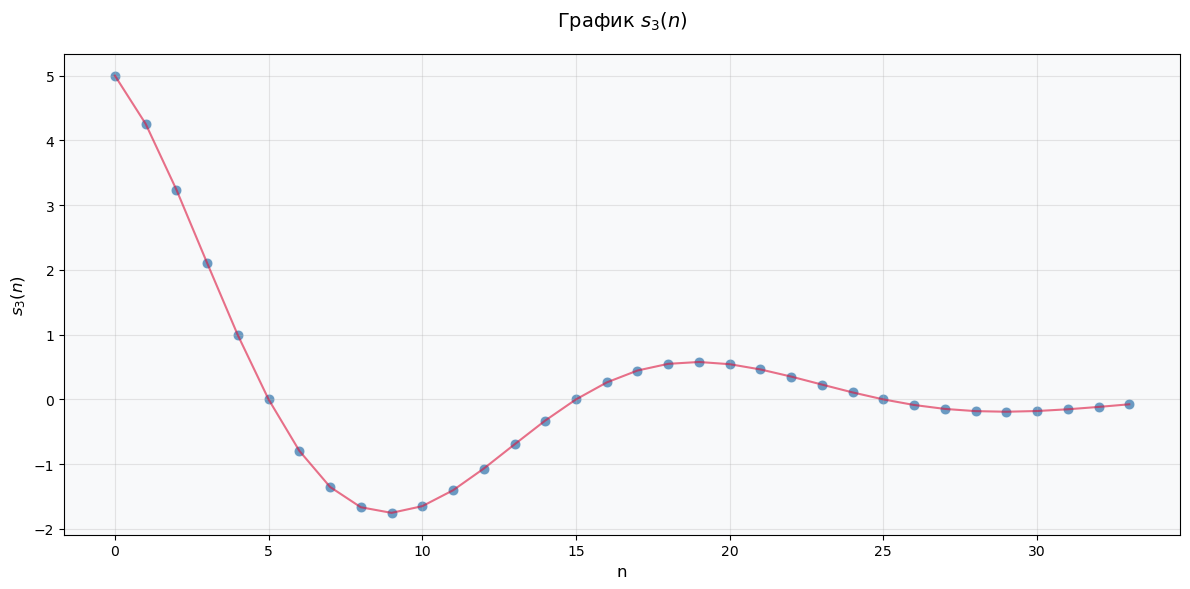

In [36]:
def s3(k):
  return abs(a) ** k * C * np.cos(w0 * k)
    
n = np.arange(N)
Y_s3 = [s3(k) for k in n]

#дискретный гармонический сигнал с экспоненциальной огибающей
visualize_signal(n, Y_s3, 'График $s_3(n)$', 'n', '$s_3(n)$')

Аналитическое выражение для дискретного сигнала $s_3(k)$ записывается как:

$$s_3(k) = |a|^k \cdot C \cdot \cos(w_0 k)$$

Сначала формируется гармонический сигнал с амплитудой $C$, период которого определяется коэффициентом $w_0$. Затем на этот сигнал накладывается экспоненциальная огибающая $|a|^k$, что приводит к изменению амплитуды во времени. В результате сигнал приобретает затухающий характер.

## 4. Вывести график пяти периодов периодической последовательности $s_4(k)$ дискретных прямоугольных импульсов амплитуды $U$ и длительности $n_{imp}$ с периодом, вдвое большим длительности импульса.

Пояснить операции при моделировании периодической последовательности.

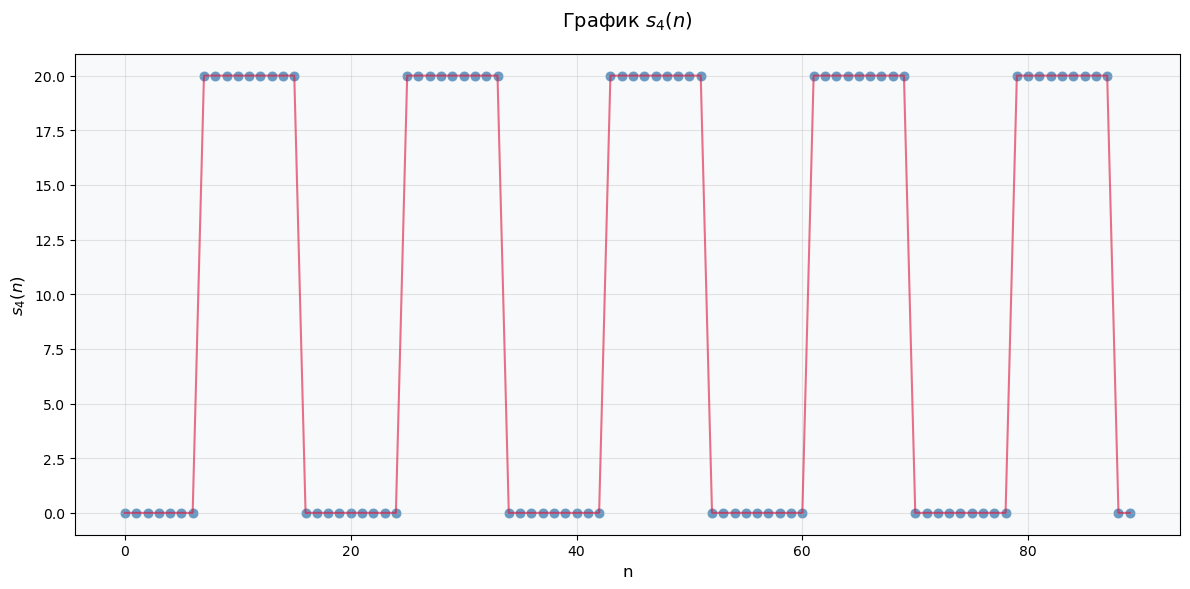

In [42]:
def s4(k):
  return s1(k % (n_imp * 2))

n = np.arange(5 * 2 * n_imp)
Y_s4 = [s4(k) for k in n]

#периодическая последовательность из пяти дискретных прямоугольных импульсов
visualize_signal(n, Y_s4, 'График $s_4(n)$', 'n', '$s_4(n)$')

Периодическая последовательность $s_4(k)$ формируется на основе прямоугольного импульса амплитуды $U$ и длительности $n_{imp}$.

Период $T$ выбран равным $2 \cdot n_{imp}$, то есть между импульсами присутствует пауза той же длины, что и длительность импульса.

При моделировании для каждого дискретного момента времени $k$ вычисляется остаток от деления $k$ на период $T$. Если остаток меньше $n_{imp}$, в сигнал записывается значение $U$; иначе — 0.

Таким образом, каждые $T$ отсчётов повторяется одинаковый прямоугольный импульс, что даёт периодическую последовательность с пятью периодами.

## Выводы по лабораторной работе

В ходе лабораторной работы были изучены и реализованы методы моделирования дискретных сигналов и их линейных комбинаций. Были построены и проанализированы различные виды дискретных последовательностей: единичный скачок, прямоугольный импульс, гармонические сигналы, сигнал с экспоненциальной огибающей и периодическая последовательность импульсов.

### Основные результаты работы:

1. **Смоделирован дискретный прямоугольный импульс** на основе единичного скачка с использованием разности двух сдвинутых скачков

2. **Реализована линейная комбинация гармонических сигналов** и вычислены её характеристики:
   - Среднее значение
   - Энергия сигнала
   - Средняя мощность

3. **Построен дискретный гармонический сигнал** с экспоненциальной огибающей, демонстрирующий затухающие колебания

4. **Создана периодическая последовательность** из пяти дискретных прямоугольных импульсов с заданным периодом

### Заключение:
С помощью программных средств проведено моделирование и визуализация сигналов на интервале дискретного времени. Полученные графики подтвердили теоретические зависимости и позволили наглядно оценить влияние параметров амплитуды, частоты и коэффициентов линейной комбинации на форму результирующего сигнала. Для каждого типа последовательностей подробно объяснены принципы моделирования и математические основы их формирования.